<font size="12">Summative Assessment Part II</font>

<font size="6">Vishal Chavan</font>

This report will be investigating the supervised learning algorithm K-Nearest Neighbour Classification. KNN is a non-parametric supervised learning algorithm that consists of classification and regression techniques. 


Suppose we have data $ \mathcal{D} := (X_1, Y_1), (X_2, Y_2), \dots, (X_n, Y_n)$  where $ (X_i, Y_i) \sim P $

And for this dataset, goal is to find a mapping $ \phi : \mathcal{X} \rightarrow \mathbb{R} $ with a small *test error*

$[ R(\phi) := \mathbb{E}[(\phi(X) - Y)^2] ]$


The optimal function minimising $( R $) is $ \eta(x) = \mathbb{E}[Y | X = x] $.

KNN classifier uses distance metric such as Euclidean distance to measure the similarity between instances. That is, if $ x_0 \in \mathcal{X} $ is close to $ x_1 \in \mathcal{X} $, then we expect $ \eta(x_0) $ to be close to $ \eta(x_1) $.

## Find k-nearest neighbours and averaging

Given a point $ x \in \mathcal{X} $, we want to find $ k $ points from $ (X_1, \dots, X_n) $ with smallest distance to $ x $.

We can measure the distance between vector $ a = (a_1, \dots, a_d) \in \mathbb{R}^d $ and $ b = (b_1, \dots, b_d) \in \mathbb{R}^d $ by the Euclidean norm:

$ (a - b )_2 = \sqrt{(a_1 - b_1)^2 + \dots + (a_d - b_d)^2} $

Set $ \hat{\phi}_k(x) = \frac{1}{k} \sum_{j=1}^{k} Y_{\tau_j(x)} $

$ \hat{\phi}(x) $ is the output of the model (can be viewed as an estimate of $ \eta(x) $).


![image](https://miro.medium.com/v2/resize:fit:591/0*rANGSUaZLeVKnHDk.png)

In other terms, if you have a bunch of points on a graph, each belonging to different classes and you wanted to figure out which group a new point belongs to - you would look at the k nearest points closest to it and whichever group has the most neighbors, you would assign the new point to that group. Essentially a voting system where each of the kk neighbors gets a vote to decide the group of the new point.

## Underlying principles and assumptions

KNN is an easy to understand supervised learning technique, and can be used for regression as well as classification. It assumes that data points within a dataset will generally exist in close proximity to other instances that have similar properties. This makes it highly sensitive towards noise, the scale of data and irrelevant features. 

It works best if the categories are fairly balanced, with less features and not too many datapoints. If one category dominates, it can bias the voting and if there are a lot of features it can also affect the density of the distances and the distances between points become less informative. 

KNN treats all features as equally important in calculating distances. This means that if there are irrelevant or less important features, it can affect the model a lot. The choice of distance metric (commonly Euclidean) assumes that the straight-line distance between instances is a meaningful indicator of similarity. Different metrics can be used, but the assumption is that the chosen metric accurately reflects the structure of the feature space.

In [1]:
!pip install seaborn
import pandas
import random
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve

In [2]:
dataset = pandas.read_csv('ObesityDataSet.csv')
dataset.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II



The dataset is a mix of numeric and categorical values that are highly relevant to the output of categorising obesity levels amongst patients. Here we give an idea of the vairables by giving their relevant name and datatypes\
Gender {Female,Male}\
Age numeric\
Weight numeric\
family_history_with_overweight {yes,no}\
FAVC (Frequent consumption of high caloric food) {yes,no}\
FCVC (Frequency of consumption of vegetables) numeric\
NCP (Number of main meals) numeric\
CAEC (Consumption of food between meals) {no,Sometimes,Frequently,Always}
SMOKE (Smoker?) {yes,no}\
CH2O (Consumption of water daily) numeric\
SCC (Calories consumption monitoring) {yes,no}\
FAF (Physical activity frequency) numeric\
TUE (Time using technology devices) numeric\
CALC (Consumption of alcohol) {no,Sometimes,Frequently,Always}\
MTRANS (Transportation used) {Automobile,Motorbike,Bike,Public_Transportation,Walking}\
NObeyesdad {Insufficient_Weight,Normal_Weight,Overweight_Level_I,Overweight_Level_II,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III}\

Source: https://www.sciencedirect.com/science/article/pii/S2352340919306985, https://www.kaggle.com/datasets/ankurbajaj9/obesity-levels


In [3]:
dataset.describe()
dataset['NObeyesdad'].drop_duplicates().sort_values()

59     Insufficient_Weight
0            Normal_Weight
10          Obesity_Type_I
68         Obesity_Type_II
202       Obesity_Type_III
3       Overweight_Level_I
4      Overweight_Level_II
Name: NObeyesdad, dtype: object

In [4]:
dataset.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
dataset.dtypes
to_numeric_cols = ['Gender','family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC','CALC','MTRANS']

#one hot enconding for categorical data
datasetclean = pandas.concat([dataset.drop(columns=to_numeric_cols), pandas.get_dummies(dataset[to_numeric_cols])],axis=1)
datasetclean.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,Normal_Weight,True,...,False,False,False,False,True,False,False,False,True,False
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,Normal_Weight,True,...,True,False,False,True,False,False,False,False,True,False
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,Normal_Weight,False,...,False,False,True,False,False,False,False,False,True,False
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,Overweight_Level_I,False,...,False,False,True,False,False,False,False,False,False,True
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,Overweight_Level_II,False,...,False,False,False,True,False,False,False,False,True,False


In [6]:
X = datasetclean.drop('NObeyesdad', axis=1)
y = datasetclean['NObeyesdad']


ival = [i for i in range(10,100,10)]
train_acc=[]
test_acc=[]
val_acc=[]
val_var=[]
result = []
set_size=[]
X_init, X_val, y_init, y_val = train_test_split(X, y, test_size=0.1)

#use scaler for scaling data to fit a standard normal distribution
scaler = StandardScaler()
X_val = scaler.fit_transform(X_val)
for i in ival:
    var_x = [a for a in range(0,10)]
    set_size2 = [a for a in range(0,10)]
    for a in range(0,10):
        X_train, X_test, y_train, y_test = train_test_split(X_init, y_init, test_size=(1-i/100))
        set_size2[a]=len(X_train)
        
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        

        knn = KNeighborsClassifier(n_neighbors=3)
        knn.fit(X_train, y_train)

        y_test_pred = knn.predict(X_test)
        y_train_pred = knn.predict(X_train)
        y_val_pred = knn.predict(X_val)

        test_accuracy = accuracy_score(y_test, y_test_pred)
        train_accuracy2 = accuracy_score(y_train, y_train_pred)
        val_accuracy = accuracy_score(y_val, y_val_pred)

        test_acc.append(test_accuracy)
        #val_acc.append(val_accuracy)
        train_acc.append(train_accuracy2)
        var_x[a]=[val_accuracy]
    val_var.append(np.var(var_x))
    val_acc.append(np.mean(var_x))
    set_size.append(np.mean(set_size2))

Text(0, 0.5, 'Size of set')

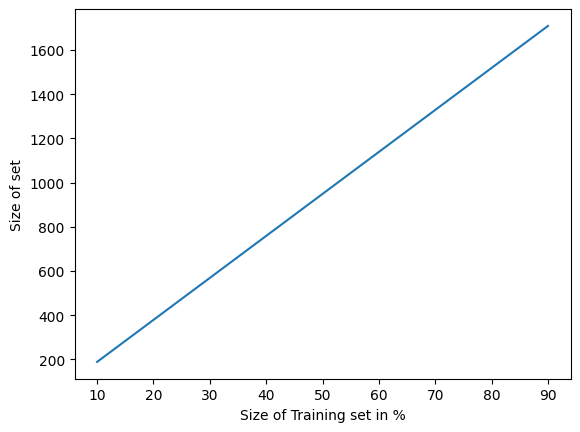

In [7]:
sns.lineplot(x=ival,y=set_size)
plt.xlabel("Size of Training set in %")
plt.ylabel("Size of set")

This graph shows the numeric change in size of dataset based on the % changed in the experiment. We continue by taking a look at the change in variance of the model as the size increases.

Text(0, 0.5, 'Average variance')

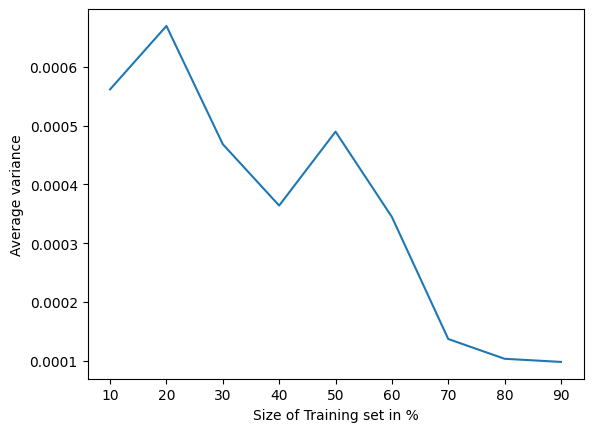

In [8]:
sns.lineplot(x=ival,y=val_var)
plt.xlabel("Size of Training set in %")
plt.ylabel("Average variance")

As we can clearly see from the graph, the average variance for the accuracy of the model decreases as the size of training set increases. We will further see how the average accuracy score is when the size of the model increases

Text(0.5, 0, 'Size of Training set in %')

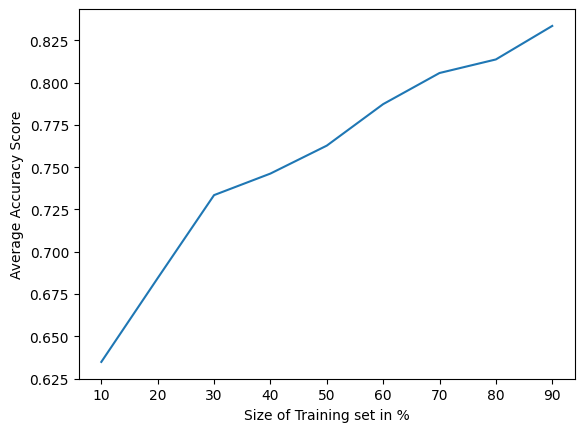

In [9]:
sns.lineplot(x=ival,y=val_acc)
plt.ylabel("Average Accuracy Score")
plt.xlabel("Size of Training set in %")

This graph indicates that the average accuracy of the model increases as the size of training set increases. 
We will now explore the appropriate metric for measuring the performance of the model.


In [10]:
X_init, X_test, y_init, y_test = train_test_split(X, y, test_size=10)
X_train, X_val, y_train, y_val = train_test_split(X_init, y_init, test_size=0.10)

#use scaler for scaling data to fit a standard normal distribution
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_train_pred = knn.predict(X_train)
y_val_pred = knn.predict(X_val)

train_accuracy2 = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

val_acc.append(val_accuracy)
train_acc.append(train_accuracy2)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')

# Calculate metrics for validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
precision_val = precision_score(y_val, y_val_pred, average='weighted')
recall_val = recall_score(y_val, y_val_pred, average='weighted')
f1_val = f1_score(y_val, y_val_pred, average='weighted')


# Print the metrics
print(f"Training Accuracy: {accuracy_train:.2f}")
print(f"Validation Accuracy: {accuracy_val:.2f}")
print(f"Training Precision: {precision_train:.2f}")
print(f"Validation Precision: {precision_val:.2f}")
print(f"Training Recall: {recall_train:.2f}")
print(f"Validation Recall: {recall_val:.2f}")
print(f"Training F1 Score: {f1_train:.2f}")
print(f"Validation F1 Score: {f1_val:.2f}")

Training Accuracy: 0.90
Validation Accuracy: 0.81
Training Precision: 0.90
Validation Precision: 0.81
Training Recall: 0.90
Validation Recall: 0.81
Training F1 Score: 0.90
Validation F1 Score: 0.80


From this exercise we see that the different performance metrics match closely numerically. However, we can choose an appropriate metric based on the relevance of it towards or problem. 

Accuracy score is the ratio of correctly predicted observations to the total observations and to be used when the classes are well balanced and the costs of false positives and false negatives are roughly equal. 

Precision is used when the cost of a false positive is high. For example, if a person who is not obese is marked as obese.(the ratio of positive observations in a class to the total predicted positive observations)

Recall is used when the cost of a false negative is high. For example, if a person who is obese is not marked as obese. (ratio of positive observations to all observations in actual class)

F1 score is used when there is a need for balance between recall and precision as it is a weighted average of both of them. It is better for cases with uneven class distribution.

Considering these performance metrics we choose Accuracy score as the performance metric since our dataset is well balanced and the cost of false positives and false negatives are both equal.


We now see how the performance of the model changes as we vary the hyperparameter 'k'

In [11]:
#split the train and test data 
X_init, X_test, y_init, y_test = train_test_split(X, y, test_size=10)
X_train, X_val, y_train, y_val = train_test_split(X_init, y_init, test_size=0.10)

#use scaler for scaling data to fit a standard normal distribution
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

#get values for training accuracy and validation accuracy by training, fitting and predict on knn
val_acc=[]
train_acc=[]
K=[i for i in range(1,40)]
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_val_pred = knn.predict(X_val)

    train_accuracy2 = accuracy_score(y_train, y_train_pred)
    val_accuracy = accuracy_score(y_val, y_val_pred)

    val_acc.append(val_accuracy)
    train_acc.append(train_accuracy2)

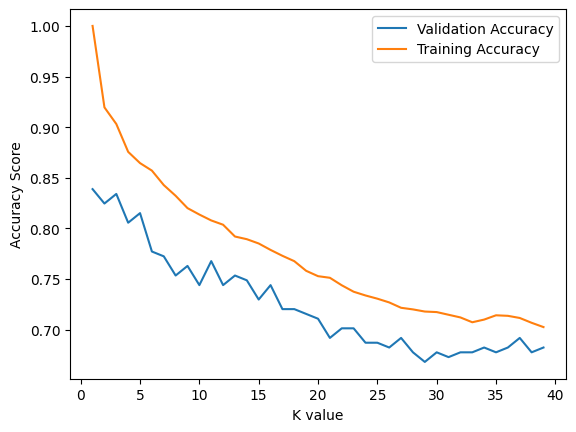

In [28]:
#plot the values
sns.lineplot(x=K,y=val_acc,label="Validation Accuracy")
sns.lineplot(x=K,y=train_acc,label="Training Accuracy")
plt.ylabel("Accuracy Score")
plt.xlabel("K value")
plt.legend()

As it is clear from the graph, the Accuracy score for the model's training and validation decrease as the value of the hyper-parameter k increases. The difference between the accuracy scores of Validation set and Training set is also quite interesting to see. Due to the high accuracy scores we can assume that there is a level of over-fitting happening for low values of k especialy in the training set. 


Text(0, 0.5, 'Accuracy Score')

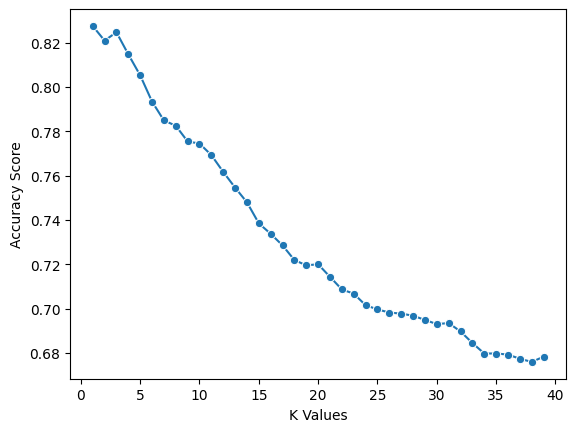

In [29]:
#set k values for the model
k_values = [i for i in range (1,40)]
scores = []

#use scaler for scaling data to fit a standard normal distribution
scaler = StandardScaler()
X = scaler.fit_transform(X)

#loop through the k values and save them to plot
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=6)
    scores.append(np.mean(score))
    
#plot the values
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

As KNN has only 1 hyper-parameter we vary that to see how the performance of the test varies. 

It is quite easy to see that as the value of K increases the accuracy of the model starts dropping. One interesting thing we can observe here is the curve is smoother when we are using cross validation score and the 2 highest values for accuracy are coming from k being equal to 1 and 3. As k can have chances of overfitting when k=1, we can consider that k=3 is the best choice of hyperparameter for this model.

### The curse of dimensionality

As KNN is works on the concepts of if $ x_0 \in \mathcal{X} $ is close to $ x_1 \in \mathcal{X} $, then we expect $ \eta(x_0) $ to be close to $ \eta(x_1) $. It starts failing as the number of dimensions start increasing as the points never tend to be close to each other. Also, in high-dimensional space it becomes computationally more expensive to calculate the distance and find the k nearest neighbors. Let us consider the very simple example where our dataset has $f$ number of features. Each feature  ranges from [0, 1]. Let’s further assume that each feature’s values are uniformly distributed.

In this environment, we are attempting to find the length of a side of a cube containing k=10 data points.

Let the length of the smallest hyper-cube be $ \ell $ that contains all $k$-nearest neighbor of a test point.
Then $ \ell^d \approx \frac{k}{n} $ and $ \ell \approx \left(\frac{k}{n}\right)^{1/d} $. We observe how the values of $ \ell $ change as the dimensions increase. 

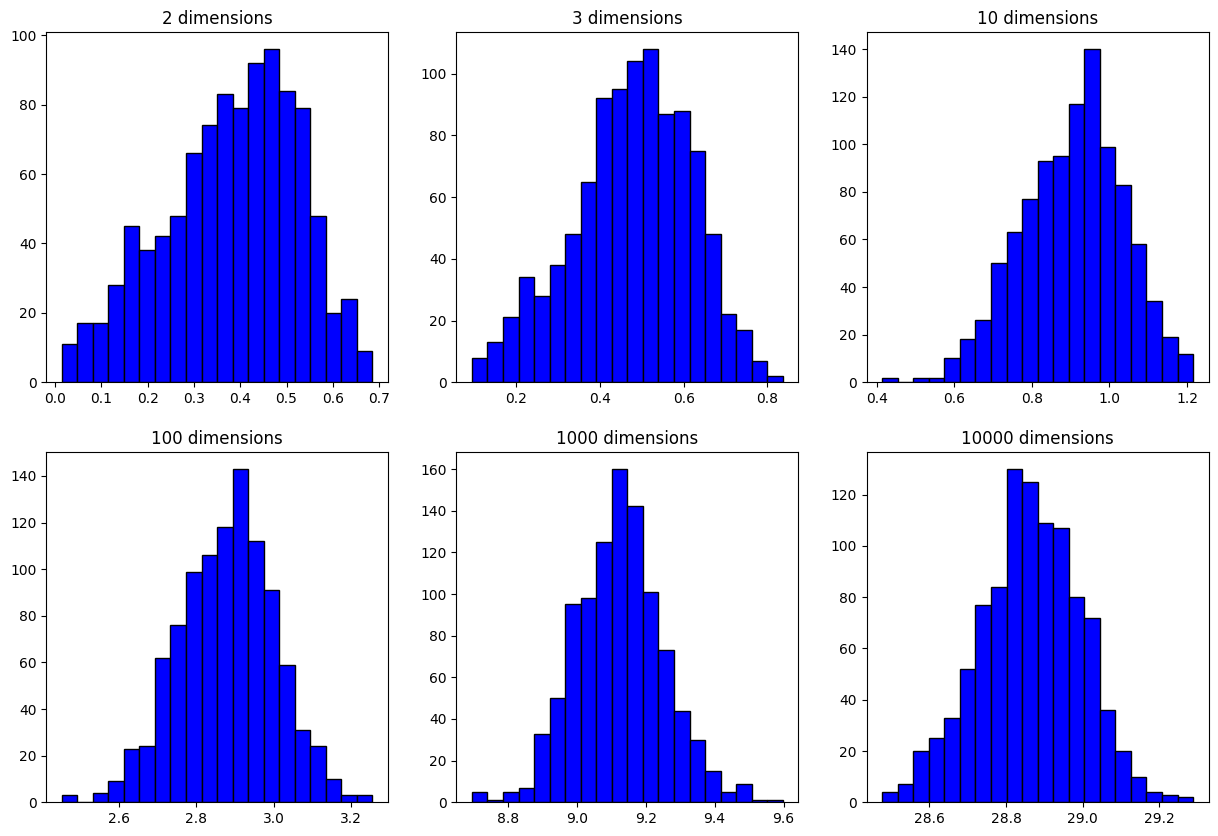

In [30]:
#create a figure and a set of subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

#list of dimensions to create histograms for
dimensions = [2, 3, 10, 100, 1000, 10000]

#loop over the dimensions and plot the histograms
for ax, dims in zip(axs.flatten(), dimensions):
    num_points=1000
    points = np.random.uniform(low=0.0, high=1.0, size=(num_points, dims))
    center = np.ones(dims) * 0.5
    distances = np.linalg.norm(points - center, axis=1)
    ax.hist(distances, bins=20, density=False, color='blue', edgecolor='black')
    ax.set_title(f'{dims} dimensions')

#plot the graph
plt.show()

We observe that as the dimensions increase, similar observations are clustered closer together in a high-dimensional dataset as the distance between all data points becomes smaller and smaller.

We can use a feature selection technique or feature extraction to eliminate more redundant features from the dataset or extract features into a low-dimensional space. These methods ensure that we only keep the most relevant features.

PCA and kernel methods are especially beneficial when the true dimensionality of the dataset is lower than the actual representation. For example, we can represent the points on a 2-dimensional plane in 3D space with 2 features after a mapping.

Another data reduction technique is to represent data in smaller forms with fewer observations. Numerosity reduction algorithms help with k-NN performance as the number of calculations decreases.